In [1]:
import numpy as np
import matplotlib.cm as cmap
import os.path
import scipy
import scipy.signal as signal
import pickle as pickle
from brian2 import *
import brian2
from brian2tools import *
from PIL import Image
from struct import unpack
import matplotlib.pyplot as plt
import math
import time

In [155]:
stimuli_file = './pic_120_italic.tif'
fig_num = 1

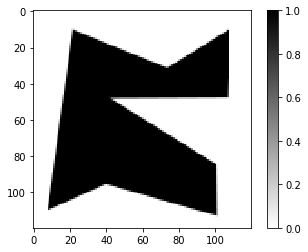

In [156]:
img = Image.open(stimuli_file)
img.load()
img_arr = np.asarray(img, dtype="int32")
stimuli = np.absolute(img_arr)/255

# fig = figure(fig_num, figsize = (10, 10))
im2 = imshow(stimuli, vmin = np.min(stimuli), vmax = np.max(stimuli) , cmap = cmap.get_cmap('gray_r'))
colorbar(im2)
fig_num += 1

In [157]:
def gaussian2D(x, y, sigma):
    return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/((sigma**2)))*(x**2 + y**2))
#     return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/(2*math.pi*(sigma**2)))*(x**2 + y**2))

In [158]:
def plotFilter(fun):
    g = receptiveFieldMatrix(fun) 
    im = imshow(g, cmap=cmap.get_cmap('gray_r'))
    colorbar(im)

In [159]:
def mexicanHat(x,y,sigma1,sigma2): 
    return gaussian2D(x,y,sigma1) - gaussian2D(x,y,sigma2)

In [160]:
def receptiveFieldMatrix(func):
    h = 11
    g = np.zeros((h,h))
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-int(h/2)
            y = yi-int(h/2)
            g[xi, yi] = func(x,y);
    return g

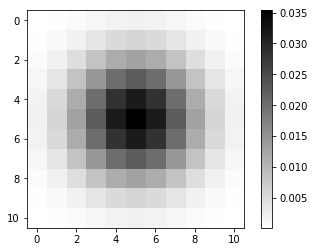

In [161]:
plotFilter(lambda x,y:gaussian2D(x,y,3))

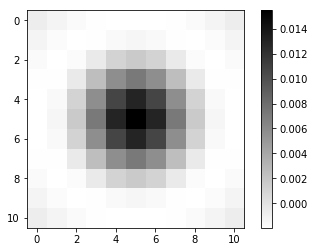

In [162]:
plotFilter(lambda x,y: mexicanHat(x,y,3,4))

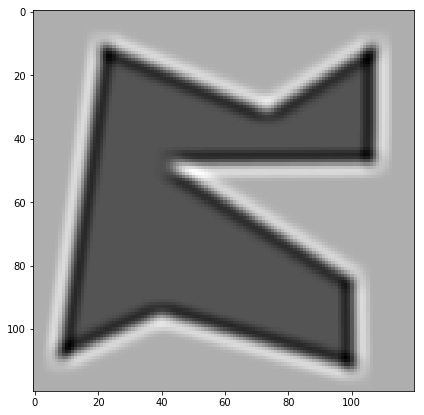

In [165]:
Img_barHat = signal.convolve(stimuli, receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,3,4)), mode='same')
fig = figure(fig_num, figsize = (7, 7))
imgplot = imshow(Img_barHat, cmap=cmap.get_cmap('gray_r'))
fig_num += 1

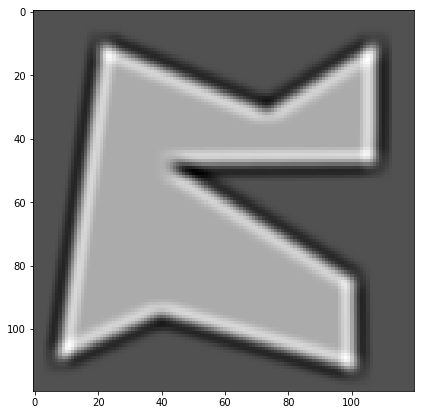

In [166]:
Img_barHat = signal.convolve(stimuli, receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,4,3)), mode='same')
fig = figure(fig_num, figsize = (7, 7))
imgplot = imshow(Img_barHat, cmap=cmap.get_cmap('gray_r'))
fig_num += 1

In [167]:
arr = Img_barHat
if (np.amin(Img_barHat) < 0):
    arr = Img_barHat + abs(np.amin(Img_barHat))

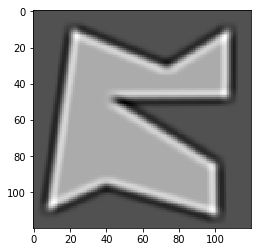

In [168]:
imgplot = imshow(arr, cmap=cmap.get_cmap('gray_r'))

In [169]:
np.amin(arr2)

0.0

In [55]:
np.amax(arr2)

2.218775487855684

In [60]:
arr2 = (arr*10)*3

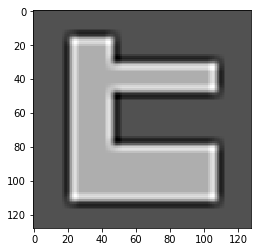

In [61]:
imgplot = imshow(arr2, cmap=cmap.get_cmap('gray_r'))